# HomeWork 1- 17350796

It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, 
as declared to the Revenue Commissioners for stamp duty purposes
csv file = ppr-17350796.csv

## Part 1: Preparing the data from CSV



In [2]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats
#for cat plots
import seaborn as sns



Reading in the data and displaying the first 5 rows:


In [3]:
df = pd.read_csv('ppr-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)


## First 5 rows

In [4]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,06/05/2016,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,"€630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,22/12/2014,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,"€281,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,22/05/2020,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,"€560,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/11/2014,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,"€46,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/11/2018,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,"€204,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


## Last 5 rows

Displaying the last 5 rows

In [5]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,15/12/2017,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,18/12/2012,"17 the court, cypress downs, templeogue",NaN,Dublin,"€605,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,14/12/2016,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,"€46,666.67",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,19/06/2017,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,"€176,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/11/2017,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,"€86,738.06",Yes,No,Second-Hand Dwelling house /Apartment,NaN


#### Shape of data frame

Display number of rows and columns- 10000 = Rows, 9 = columns

In [6]:
# number of rows and columns
df.shape

(10000, 9)

The data is currently all read as type object. The data needs to be change to the appropriate data type for it to be accurately analysed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1860 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1029 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Looking at the column names for errrors 

In [8]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

### Editing price data in oder to change its type

In [9]:
# Converting price to float, you need to remove all symbols from strings for the command to work. 



df['Price (€)'] = df['Price (€)'].str.replace(',', '')


df['Price (€)'] = df['Price (€)'].str.replace('€', '')

df['Price (€)'] = df['Price (€)'].astype(float)

df[['Price (€)']]

,Price (€)
0,630000.00
1,281000.00
2,560000.00
3,46000.00
4,204000.00
...,...
9995,200000.00
9996,605000.00
9997,46666.67
9998,176000.00


These object features have been changed to categorical as they each describe unique values

### Changing data types

In [118]:

# There are a set number of unique counties
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')






df.dtypes

Date of Sale (yyyy/mm/dd)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
Month                           int64
Year                            int64
percent                       float64
Season                       category
Province                     category
dtype: object

In [11]:
# converting dates to date data type
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'])

df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

In [12]:
df.head(4)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### Renaming Date of Sale (dd/mm/yyyy)	to Date of Sale (yyyy/mm/dd)	

- This is was necessary as the chaning of type caused the year and day to swap. 

In [13]:
df.rename(columns={"Date of Sale (dd/mm/yyyy)":"Date of Sale (yyyy/mm/dd)"}, inplace=True)


### Splitting Year and Month into their own category

In [14]:
df['Month'] = pd.DatetimeIndex(df['Date of Sale (yyyy/mm/dd)']).month
df['Year'] = pd.DatetimeIndex(df['Date of Sale (yyyy/mm/dd)']).year


df.head(10)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2016
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2014
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2020
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2014
4,2018-11-22,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2018
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,1,2016
6,2021-11-30,"10 HOLLOW WAY, OAKVIEW VILLAGE, TRALEE",NaN,Kerry,182000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2021
7,2016-02-05,"Ballygibbon, Nenagh",NaN,Tipperary,264317.0,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2,2016
8,2018-12-03,"RANDLESTOWN, BALLYCOGLEY, WEXFORD",NaN,Wexford,70000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2018
9,2015-11-17,"3 RIVER STREET, CLARA, CO OFFALY",NaN,Offaly,34500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2015


#### Checking integrity of Year and Month sales:

In [15]:
# There are no house sales in the future
df.loc[(df['Year'] > 2022)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


#### Dates in the future:

- We can see there is sales in the future. I am not sure how this is possible.
- My hypothesis is that it was a data entry mistake. i.e the day was entered as the month and the month was entered as the day.
- Thus, I believe the following houses were actually sold in January of this year. 

In [16]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
3042,2022-04-01,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",NaN,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2022
6237,2022-06-01,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,6,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,NaN,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022


In [17]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
3042,2022-04-01,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",NaN,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2022
6237,2022-06-01,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,6,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,NaN,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022


- No dates less than or equal to 2009, which makes sense 

In [18]:
df.loc[(df['Year'] <= 2009)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


####  Checking logical integrity of months:

In [19]:
df.loc[(df['Month'] < 1) | 
                         (df['Month']> 12)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


In [20]:
df.dtypes

Date of Sale (yyyy/mm/dd)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
Month                                 int64
Year                                  int64
dtype: object

Looking for duplicate rows and columns

In [21]:
# There is 20 non unique addresses 
df.nunique()

Date of Sale (yyyy/mm/dd)    2759
Address                      9980
Postal Code                    22
County                         26
Price (€)                    2285
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         3
Property Size Description       4
Month                          12
Year                           13
dtype: int64

In [22]:
df.isnull().sum()

Date of Sale (yyyy/mm/dd)       0
Address                         0
Postal Code                  8140
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8971
Month                           0
Year                            0
dtype: int64

In [23]:
df['Not Full Market Price'].value_counts(dropna=False)

No     9552
Yes     448
Name: Not Full Market Price, dtype: int64

## Postal Codes Review

The county Dublin appears 3193 times, this is the highest proportion. 

In [24]:
df.loc[df['County'].isin(['Dublin'])]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2016
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2014
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2020
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,1,2016
10,2015-06-15,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6,2015
...,...,...,...,...,...,...,...,...,...,...,...
9975,2013-04-11,"29 Carndonagh Drive, Donaghmede, Dublin 13",Dublin 13,Dublin,190000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2013
9988,2020-10-03,"44 GERALDSTOWN WOODS, SANTRY AVE, DUBLIN 9",Dublin 9,Dublin,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,10,2020
9993,2019-05-12,"6 Edenbrook Green, Edenbrook, Citywest",NaN,Dublin,348017.61,No,Yes,New Dwelling house /Apartment,NaN,5,2019
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2012


In [25]:
df["Postal Code"].describe().T

count          1860
unique           22
top       Dublin 15
freq            232
Name: Postal Code, dtype: object

58% percent have a set post code, while this is low. I have opted to keep the data as it still could provide relevent statisical inferences

There is some logical integrity issues with the data. Some post codes do not match the post codes in their addresses. NaN needs to be converted to not relevent. 

In [26]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,Address,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
1,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
2,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
3,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,No,No,Second-Hand Dwelling house /Apartment,NaN
4,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,No,No,Second-Hand Dwelling house /Apartment,NaN


#### Changing Postal Code and Propery Description NaN values to 'None'

In [27]:
df['Postal Code']= df['Postal Code'].astype('object')
df['Postal Code']= df['Postal Code'].fillna('None')


df['Property Size Description']= df['Property Size Description'].astype('object')
df['Property Size Description']= df['Property Size Description'].fillna('None')



In [28]:
df['Postal Code']= df['Postal Code'].astype('category')


df['Property Size Description']= df['Property Size Description'].astype('category')



In [29]:
df.tail(5)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
9995,2017-12-15,"KNOCKASARTNETT, KILLARNEY, KERRY",None,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2017
9996,2012-12-18,"17 the court, cypress downs, templeogue",None,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2012
9997,2016-12-14,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",None,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12,2016
9998,2017-06-19,"CARRIG RD, PARKMORE, ROSCREA",None,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6,2017
9999,2017-02-11,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,None,2,2017


### Looking at all the unique categories and their values:

In [30]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
None         8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

### Not Full Price analysis

- As you can see from above., there are 9552 'No' rows and 448 'Yes' rows. This means over 95% of the houses sold for full market price. 
- There is a small amount that did not sell for full market price. From research, this can be due to a number of reasons. For example, the dwelling may have been purchased at a reduced price under the Affordable Homes Scheme or only a fraction of the dwelling was sold. 

## Description of Property Iregularity 

'Description of Property' shows 3 unique properties. "Teach/Árasán Cónaithe Atháimhe" is the Irish translation of "Second-Hand Dwelling house /Apartment". While it is important that Irish people practice their native language for the purpose of data analytics it makes sense to change this to the english category for consistency. 

In [31]:
# getting index of where the illogical data is 
df.index[df['Description of Property'] == 'Teach/Árasán Cónaithe Atháimhe'].tolist()

[5686]

In [32]:
# replacing with english translation
df.at[5686,'Description of Property']='Second-Hand Dwelling house /Apartment'


In [33]:
# dropping the value
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand Dwelling house /Apartment')

In [34]:
df['Description of Property'].value_counts(dropna=False)

Second-Hand Dwelling house /Apartment    8364
New Dwelling house /Apartment            1636
Name: Description of Property, dtype: int64

In [35]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,10000,23,None,8140
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,10000,5,None,8971


# Describing Numeric Types

In [36]:
numeric_columns = df.select_dtypes(['float64','int']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

In [37]:
df.describe(datetime_is_numeric=True).T



,count,mean,min,25%,50%,75%,max,std
Date of Sale (yyyy/mm/dd),10000,2017-01-19 02:06:08.640000,2010-01-02 00:00:00,2014-11-07 00:00:00,2017-06-02 12:00:00,2019-08-04 00:00:00,2022-12-01 00:00:00,NaN
Price (€),10000.0,260260.702676,5500.0,120000.0,200000.0,308370.08,17151248.0,390170.322939
Month,10000.0,6.8947,1.0,4.0,7.0,10.0,12.0,3.477186
Year,10000.0,2016.5192,2010.0,2014.0,2017.0,2019.0,2022.0,3.108729


In [38]:
# numeric_DataDescription_Table = df.describe(datetime_is_numeric=True).T

# # plot = plt.subplot(111, frame_on=False)

# # #     #remove axis
# # # plot.xaxis.set_visible(False) 
# # # plot.yaxis.set_visible(False) 

# # #create the table plot and position it in the upper left corner
# # table(plot, numeric_DataDescription_Table,loc='upper right')

# #save the plot as a png file
# plt.savefig('numericDataDescribed.png')

#### Summary stats for numeric data Price (€)
From look at the price data, the standard deviation is very large, with a large range of values. Range = 17145748

In [39]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


### Median value of price

In [40]:
df['Price (€)'].median()


200000.0

In [41]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Price (€),2285


In [42]:
df['Address'].describe()

count                                                 10000
unique                                                 9980
top       APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...
freq                                                      2
Name: Address, dtype: object

In [43]:
df.to_csv('updated-ppr-17350796.csv', index=False)

In [44]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
None         8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

In [45]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
None         0.8140
Dublin 15    0.0232
Dublin 18    0.0143
Dublin 9     0.0119
Dublin 8     0.0115
Dublin 24    0.0114
Dublin 4     0.0109
Dublin 12    0.0104
Dublin 16    0.0096
Dublin 11    0.0093
Dublin 7     0.0088
Dublin 13 

### Breakdown of values as a perccentage:

In [46]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
None         0.8140
Dublin 15    0.0232
Dublin 18    0.0143
Dublin 9     0.0119
Dublin 8     0.0115
Dublin 24    0.0114
Dublin 4     0.0109
Dublin 12    0.0104
Dublin 16    0.0096
Dublin 11    0.0093
Dublin 7     0.0088
Dublin 13 

### Looking for duplicates

In [47]:
df.duplicated().sum()

0

In [48]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


## Describing categorical data

In [49]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,10000,23,None,8140
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,10000,5,None,8971


In [50]:
df_category_mode = pd.DataFrame(index = df[category_columns].describe().T.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Not Full Market Price,NaN,NaN,NaN,NaN,NaN,NaN
VAT Exclusive,NaN,NaN,NaN,NaN,NaN,NaN
Description of Property,NaN,NaN,NaN,NaN,NaN,NaN
Property Size Description,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64
CategoricalIndex(['APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE',
                  '8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY',
                  'GURETTI, HOWTH SUMMIT, NEW RD',
                  '3 BARTRA ROCK, HARBOUR ROAD, DALKEY',
                  'BALLYHAUNIS RD, CLAREMORRI

In [52]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002
Postal Code,None,8140,0.814,Dublin 15,232,0.0232
County,Dublin,3193,0.3193,Cork,1099,0.1099
Not Full Market Price,No,9552,0.9552,Yes,448,0.0448
VAT Exclusive,No,8399,0.8399,Yes,1601,0.1601
Description of Property,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636
Property Size Description,None,8971,0.8971,greater than or equal to 38 sq metres and less...,723,0.0723


In [53]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Address,0.0
Postal Code,0.0
County,0.0
Not Full Market Price,0.0
VAT Exclusive,0.0
Description of Property,0.0
Property Size Description,0.0


In [54]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df[category_columns].describe().T, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002,0.0
Postal Code,10000,23,None,8140,None,8140,0.814,Dublin 15,232,0.0232,0.0
County,10000,26,Dublin,3193,Dublin,3193,0.3193,Cork,1099,0.1099,0.0
Not Full Market Price,10000,2,No,9552,No,9552,0.9552,Yes,448,0.0448,0.0
VAT Exclusive,10000,2,No,8399,No,8399,0.8399,Yes,1601,0.1601,0.0
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636,0.0
Property Size Description,10000,5,None,8971,None,8971,0.8971,greater than or equal to 38 sq metres and less...,723,0.0723,0.0


# Visualisation- Data Quality Report

### Price feature

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

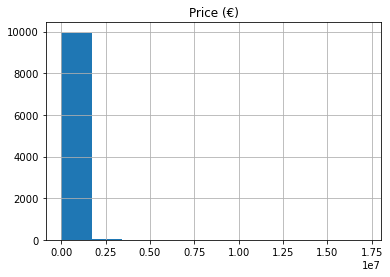

In [55]:
df[numeric_columns].hist()

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

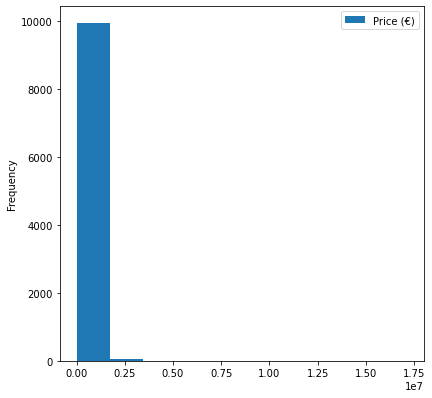

In [56]:
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,30), layout=(4,4), sharex=False, sharey=False)


### It is clear from the looking at these histograms of price that there is a large range of values, that is heavily right skewed

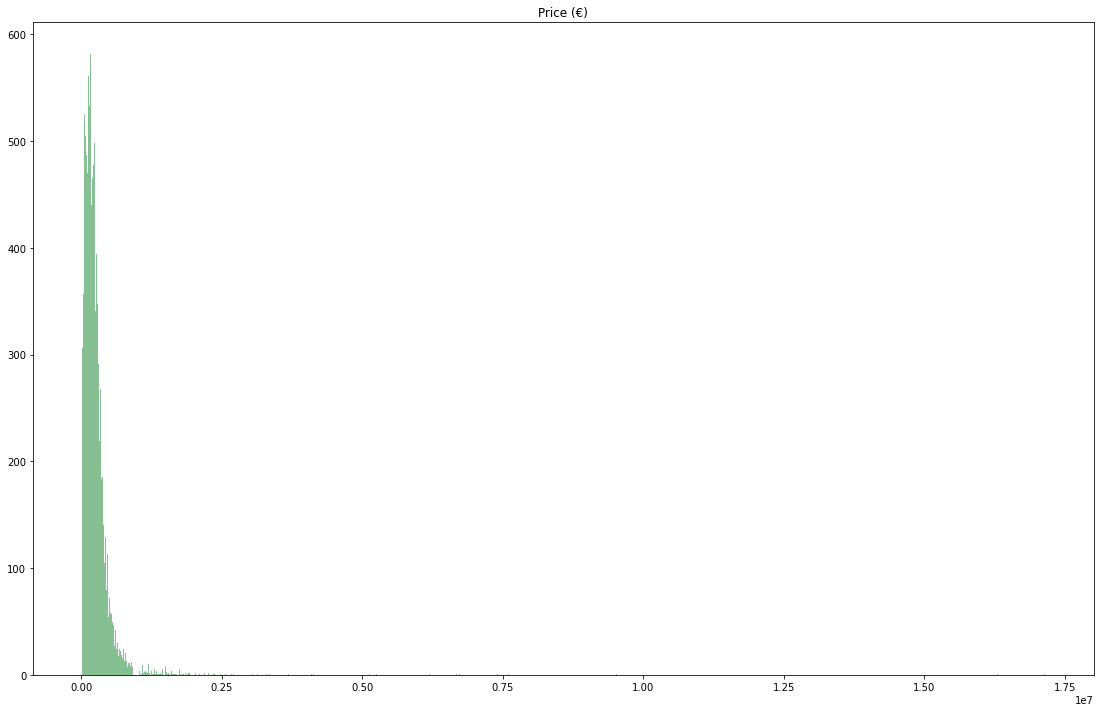

In [57]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)
plt.savefig('Homework1-DataQualityReport-NumericFeatures-histograms_all_1-1.pdf')


Box Plot of Price

From the box plot you can see there is a significant number of outliers

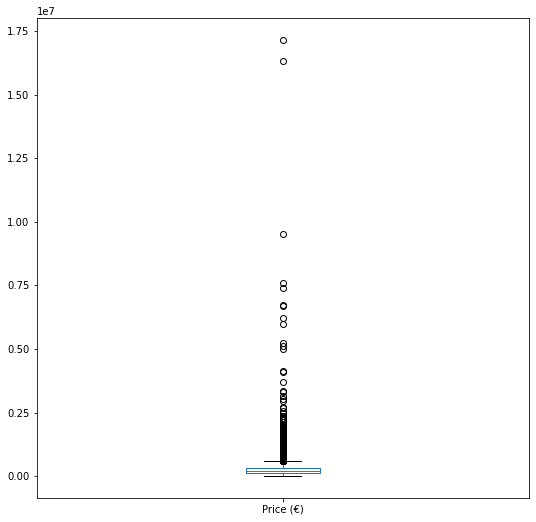

In [58]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('HomeWork-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

### Date of Sale feature 

<AxesSubplot:>

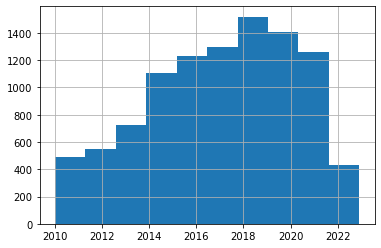

In [59]:
df['Date of Sale (yyyy/mm/dd)'].hist()

<AxesSubplot:>

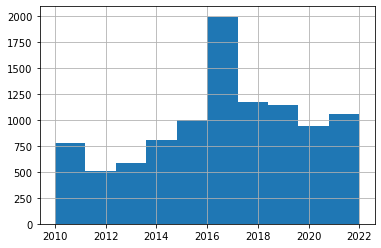

In [60]:
df['Year'].hist()

<AxesSubplot:>

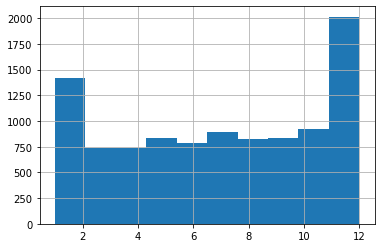

In [61]:
df['Month'].hist()

### Bar Charts for All Catergotical Features

In [62]:
# Plot bar charts for all categorical features and save them in a single PDF file
# pp = PdfPages('Homework1-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf')

# # We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# # # categorical features.
# for column in category_columns:
#     f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
#     pp.savefig(f.get_figure())
#     plt.show()

# pp.close()

## Part 2: data quality plan for the cleaned CSV file

### List of data quality issues and proposed solutions

- Date of Sale (dd/mm/yyyy): This data was converted to datetime. I will extract the months and the years in order to compare them to other features. Also, there was dates that indicated they were sold in the future. They will be adjusted as it appears they have entered incorrectly. 

- Postal Code:Large proportion missing. Opted to keep as could provide further geographical information about Dublin

- Price: Large variance in data makes it difficult for interpretation. There is potential to remove outliers

- Description of Property: Irish descriptions were tranlated so there were only two unique values for consistency.

- Property Size Description: This feature has a large amount of missing data. 

- Vat Exclusive: Less than 17% of the sales do not include the VAT in the sale price. I have chose not sepated this data and keep it as one. 


### Addressing 'Date of Sale (yyyy/mm/dd)' feature irregularity:

- As mentioned there are dates of sales in the future

In [63]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",None,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,None,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022
3042,2022-04-01,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",None,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,None,4,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",None,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",None,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,None,5,2022
6237,2022-06-01,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,None,6,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",None,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,None,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",None,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022


In [64]:
df.loc[1032,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-04',1]

df.loc[2742,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]

df.loc[3042,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-04',1]

df.loc[3900,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]

df.loc[4358,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[5494,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[5540,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-05',1]

df.loc[6237,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-06',1]

df.loc[6567,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[8340,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]


In [65]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-01-04,"5 STRAFFAN GATE, STRAFFAN, KILDARE",None,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
2742,2022-01-07,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
3042,2022-01-04,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",None,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,None,1,2022
3900,2022-01-07,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
4358,2022-01-12,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
5494,2022-01-12,"RUSHLAKE, WOODLAWN, BALLINASLOE",None,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
5540,2022-01-05,"BIRCHILL, DROMBANE, THURLES",None,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022
6237,2022-01-06,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,None,1,2022
6567,2022-01-12,"5 Cul na Claishe, Tralee",None,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,None,1,2022
8340,2022-01-07,"TISSASSON, KINSALE, CORK",None,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2022


### Addressing 'Property Size Desciption' feature:

In [66]:
df["Property Size Description"].describe().T

count     10000
unique        5
top        None
freq       8971
Name: Property Size Description, dtype: object

In [67]:
df['Property Size Description'].unique()

['None', 'greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']
Categories (5, object): ['None', 'greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']

In [68]:
df['Property Size Description'].value_counts()

None                                                                 8971
greater than or equal to 38 sq metres and less than 125 sq metres     723
greater than 125 sq metres                                            135
greater than or equal to 125 sq metres                                 94
less than 38 sq metres                                                 77
Name: Property Size Description, dtype: int64

In [69]:
df['Property Size Description'].isnull().sum()

0

In [70]:
df.groupby('Description of Property')['Property Size Description'].count()

Description of Property
New Dwelling house /Apartment            1636
Second-Hand Dwelling house /Apartment    8364
Name: Property Size Description, dtype: int64

- As you can see 90% of the data is missing. However, as is shown 62% of New Dwelling house/Apartments have a Property Size Description attrtibuted to them. Thus, it may be valuable information to help look at the target feature Price later on. 

In [71]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & 
                         (df['Property Size Description'].isna())]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


In [72]:
df.groupby('Description of Property').count()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Property Size Description,Month,Year
Description of Property,,,,,,,,,,
New Dwelling house /Apartment,1636,1636,1636,1636,1636,1636,1636,1636,1636,1636
Second-Hand Dwelling house /Apartment,8364,8364,8364,8364,8364,8364,8364,8364,8364,8364


### Addressing the 'VAT exclusive' data

In [73]:
df.loc[df['Description of Property'] == 'New Dwelling house /Apartment']

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
7,2016-02-05 00:00:00,"Ballygibbon, Nenagh",None,Tipperary,264317.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2,2016
10,2015-06-15 00:00:00,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6,2015
15,2021-03-06 00:00:00,"4 INISHFALLEN, ROOKERY ROAD, KILLARNEY",None,Kerry,340000.00,No,Yes,New Dwelling house /Apartment,None,3,2021
20,2017-07-04 00:00:00,"Knockanna, Tinahely",None,Wicklow,105000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres,7,2017
24,2010-07-09 00:00:00,"30 Broadfield Drive, Broadfield Manor, Rathcoole",None,Dublin,281938.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7,2010
...,...,...,...,...,...,...,...,...,...,...,...
9967,2018-03-08 00:00:00,"152 BEECHDALE, DUNBOYNE, MEATH",None,Meath,330000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,3,2018
9979,2010-03-11 00:00:00,"3 Holywell Grove, Kilcoole",None,Wicklow,233480.17,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,3,2010
9983,2021-06-30 00:00:00,"Knockmore, Drinagh",None,Cork,233000.00,No,Yes,New Dwelling house /Apartment,None,6,2021
9991,2018-11-19 00:00:00,"14 Roseberry Hill, Quinagh, CARLOW",None,Carlow,173173.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,11,2018


In [74]:
print("number of 'Yes VAT exclusives: '",(df['VAT Exclusive'] == 'Yes').sum())
print("number of New Dwelling house/Apartment '",(df['Description of Property'] == 'New Dwelling house /Apartment').sum())

number of 'Yes VAT exclusives: ' 1601
number of New Dwelling house/Apartment ' 1636


In [75]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & (df['VAT Exclusive'] == 'No')]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
199,2017-08-05 00:00:00,"Unit 271 Roseberry Hill, Newbridge",None,Kildare,235000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8,2017
479,2016-08-23 00:00:00,"33 Shannon Quays, Rooskey",None,Leitrim,132159.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8,2016
738,2014-08-09 00:00:00,"Woodbine Heights, Spanish Point",None,Clare,48242.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8,2014
822,2016-12-23 00:00:00,"4 The Parade, Riverchapel Wood, Riverchapel C...",None,Wexford,130000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,12,2016
1004,2011-06-10 00:00:00,"57 Glen Tain, Carnamuggagh, Letterkenny",None,Donegal,90000.00,Yes,No,New Dwelling house /Apartment,less than 38 sq metres,6,2011
1382,2012-08-22 00:00:00,"8 Cois Abhann, Excise Street/Lyster Street, At...",None,Westmeath,125000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8,2012
1389,2013-04-07 00:00:00,"Far Finisklin, Sligo",None,Sligo,48000.00,Yes,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,4,2013
1704,2010-01-27 00:00:00,"no 8 emmet place, nenagh",None,Tipperary,140000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,1,2010
2458,2018-11-14 00:00:00,"2 THE GRAINSTORE, BAGENALSTOWN, CARLOW",None,Carlow,107825.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,11,2018
2744,2015-06-11 00:00:00,"50 Abhainn glas, Edgeworthstown",None,Longford,35000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6,2015


Only 35 "New Dwelling house/Apartment" are marked as 'No' for Vat Exclusive. The other 1601 are marked as 'Yes'. This is in line with the information for the revenue regarding VAT payments on new property. New properties that meet certain conditions must pay VAT at a rate of 13.5%- https://www.revenue.ie/en/property/stamp-duty/consideration/vat-exclusive-consideration.aspx#:~:text=If%20you%20buy%20or%20lease,on%20the%20VAT%2Dexclusive%20amount.
This does not apply to second hand property which we can see in the data:

In [76]:
print("number of 'No' VAT exclusives: '",(df['VAT Exclusive'] == 'No').sum())


number of 'No' VAT exclusives: ' 8399


For this there is no reason to extract or remove any of the Vat Exclusive data as there are differences only for a very small amount of data and the difference may only be 13.5%

### Looking at the outliers of the price data 

As you can see there is a large range of values for the target feature of price. 

In [77]:
print(df['Price (€)'].mean(), "mean of price data")
print(df['Price (€)'].std(), "standard deviation of price data")

260260.70267600025 mean of price data
390170.3229389402 standard deviation of price data


There are some sales that were very high in price. These are explored in more detail later:

In [78]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


As you can see some values for sales are extremely low like €5500. Having looked into these sales, some are that low because they are ruins that were bought 9 years ago. It is difficult to determine if they were input mistakes or genunine mistakes. Due to this uncertainty I have decided to keep these outliers. 

In [79]:
df.sort_values(by='Price (€)', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
2094,5500.0
8321,5500.0
4708,6000.0
2661,6348.0
2772,6608.0
2950,7250.0
2582,7300.0
2846,7500.0
5542,7500.0
2749,7500.0


In [80]:
df.loc[df['Price (€)'] <= 10000]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
624,2018-05-29 00:00:00,"617 HOWTH ROAD, RAHENY, DUBLIN 5",Dublin 5,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,5,2018
849,2014-08-20 00:00:00,"Glensharrold, Carrickerry",None,Limerick,8000.00,No,No,Second-Hand Dwelling house /Apartment,None,8,2014
1276,2017-11-09 00:00:00,"226 CASTLE CURRAGH HEATH, DUBLIN 15, DUBLIN",Dublin 15,Dublin,8697.91,No,No,Second-Hand Dwelling house /Apartment,None,11,2017
1320,2016-04-13 00:00:00,"RAEMORE, KIELDUFF, CO KERRY",None,Kerry,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,4,2016
1480,2015-09-22 00:00:00,"20 MILLWHARF APARTMENTS, MERCHANTS QUAY, DROGHEDA",None,Louth,9039.78,No,No,Second-Hand Dwelling house /Apartment,None,9,2015
1580,2010-03-12 00:00:00,"MAIN STREET, KILTEALY",None,Wexford,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,3,2010
2094,2015-12-14 00:00:00,"19 Aranleigh Mount, Rathfarnham, Dublin 14",Dublin 14,Dublin,5500.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2015
2267,2015-10-06 00:00:00,"APT 35 BUCKINGHAM VILLAGE, DUBLIN 1, DUBLIN",Dublin 1,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,10,2015
2582,2019-02-04 00:00:00,"74 SPRING LANE RD, BALLYVOLANE, CORK",None,Cork,7300.00,No,No,Second-Hand Dwelling house /Apartment,None,2,2019
2661,2013-10-14 00:00:00,"Friarsquarter, Ballinrobe",None,Mayo,6348.00,No,No,Second-Hand Dwelling house /Apartment,None,10,2013


array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

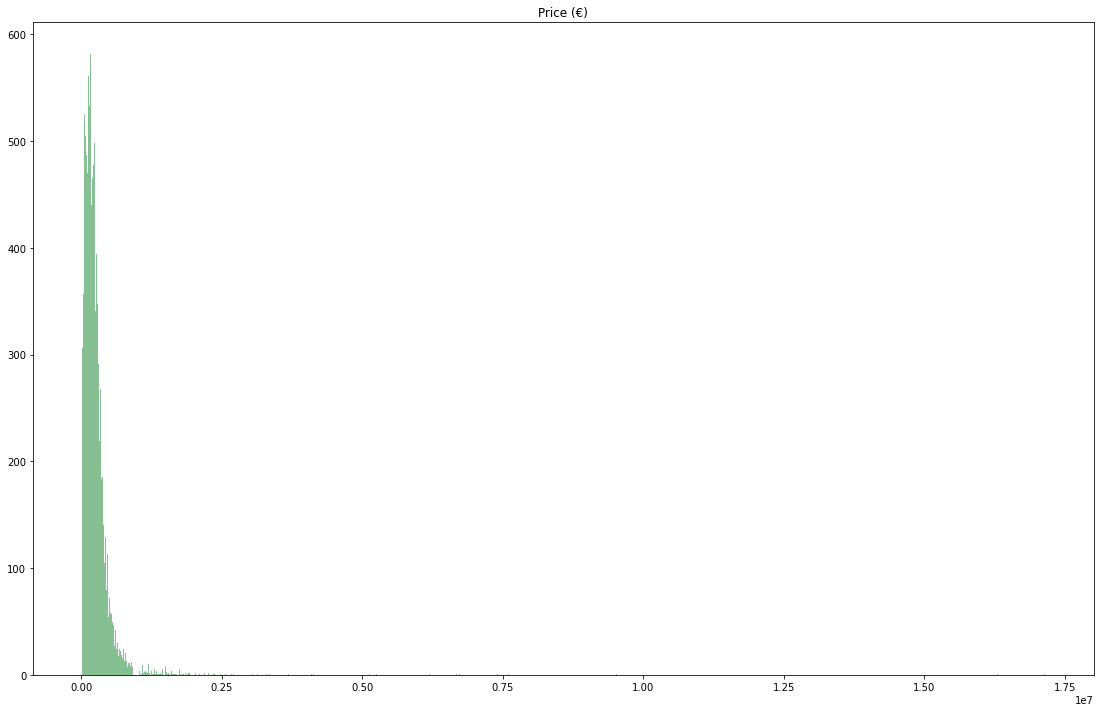

In [81]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


In [82]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


The sale of property worth €17,151,248 and €16308370.05
has been dropped. As these is a large blocks of apartments. Thus, it does not makes sense to compare it to other sing dwellings. 

In [83]:
df[((df['Price (€)'] == 17151248.00))].index


Int64Index([4518], dtype='int64')

In [84]:
# All large blocks of apartments with no accurate way of braking up the dwellings and determining their individual prices
df = df.drop(index=7913)
df = df.drop(index=4518)
df = df.drop(index=7698)
df = df.drop(index=6404)
df = df.drop(index=3999)
df = df.drop(index=561)








In [85]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
915,7600000.00
3167,6720000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00
4438,5127753.00
2542,5000000.00
787,4138200.00
8462,3691629.96
242,3350000.00


The histogram of price looks like this with the outliers removed:

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

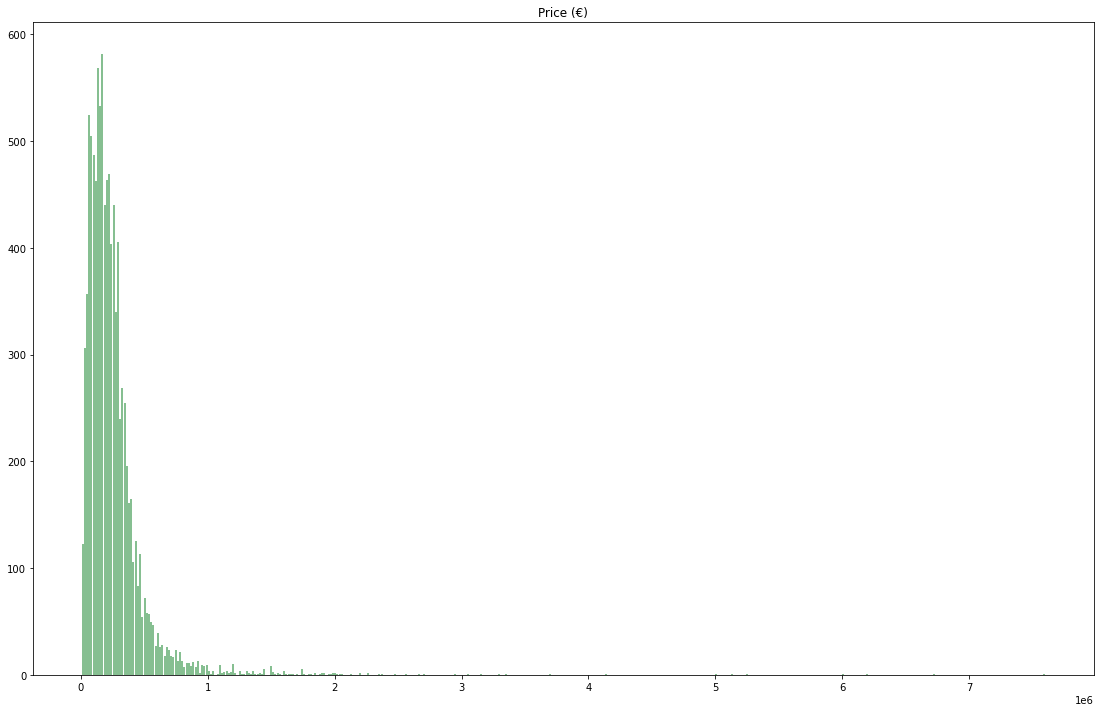

In [86]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


## Final Summary of Data Quality Plan

| Variable Name | Data Quality Issue | Handling Stratergy |
| :- | :- | :- |
| Price (€) | Outliers | Remove high outliers, keep low outliers |
| Postal Code | Missing data |Do nothing|
| Description of Property | Descriptions were in Irish | Irish descriptions were tranlated so there were only two unique values for consistency |
| Propert Size Description | Missing data | Do nothing |
| VAT exclusive | Provides varying info, with potentially not much meaning | Do nothing |
| Date of Sale| There are dates in the future | Edit future dates |
| Not Full Market Price	| very small % dwellings are not full market price | Do nothing |




In [87]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9994.0,254297.557243,280514.246613,5500.0,120000.0,200000.0,308370.0225,7600000.0


In [88]:
df[category_columns].describe().T

,count,unique,top,freq
Address,9994,9974,"MONUMENT RD, MENLO, GALWAY",2
Postal Code,9994,23,None,8135
County,9994,26,Dublin,3188
Not Full Market Price,9994,2,No,9546
VAT Exclusive,9994,2,No,8397
Description of Property,9994,2,Second-Hand Dwelling house /Apartment,8362
Property Size Description,9994,5,None,8965


### Applying solutions to new csv file with the issues addressed:

In [89]:
df.to_csv('cleanedCSV_after_data_quality_plan-ppr-17350796.csv', index=False)

## Part 3: Exploring the relationships between feature pairs:

We want to be able to say something about the price data. 
The features that I will look at for pairwise interaction:

- County
- Year
- Month
- Description of property

The reasons for these choices, are these factors could all give insight and to provide markers into house prices. 

### County and Price bar char

- As you can see Dublin has the highest amount with Longford, Roscommon and Leitrim being the lowest

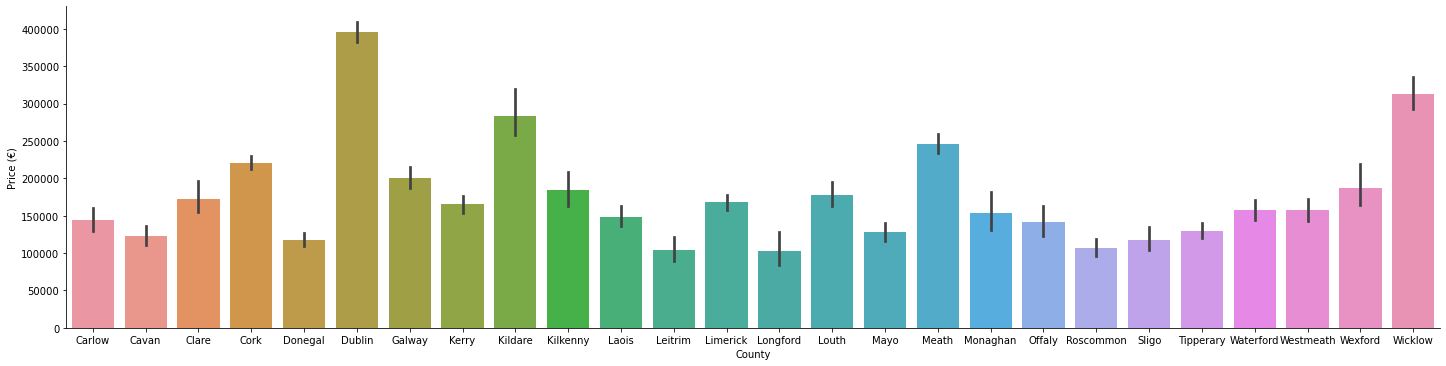

In [90]:
sns.catplot(x="County", y= "Price (€)", kind="bar",aspect=4,data=df)

### County and Price Box plot

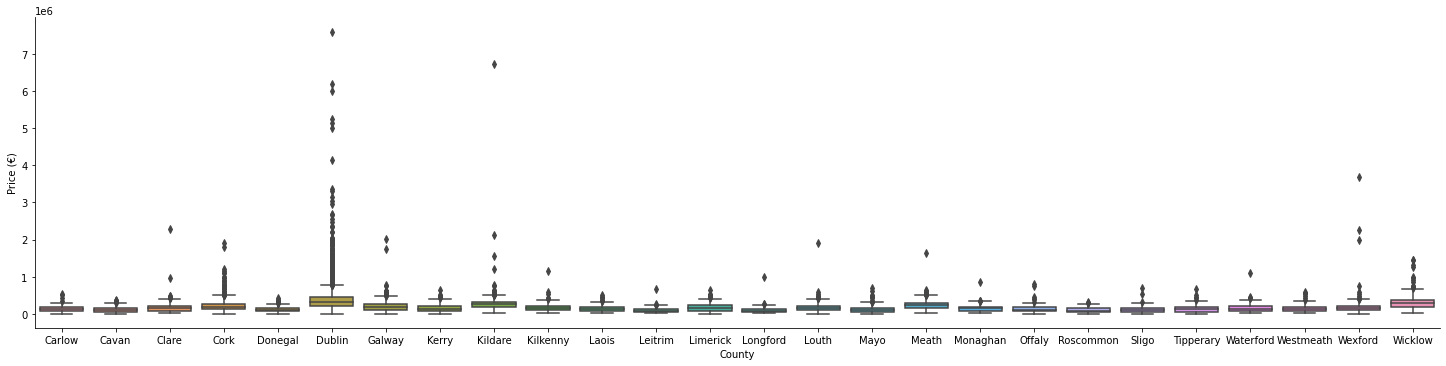

In [91]:
sns.catplot(x="County", y= "Price (€)", kind="box",aspect=4,data=df)

### Year and Price bar chart

- As you can see 2012 has the lowest with 2021 having the highest

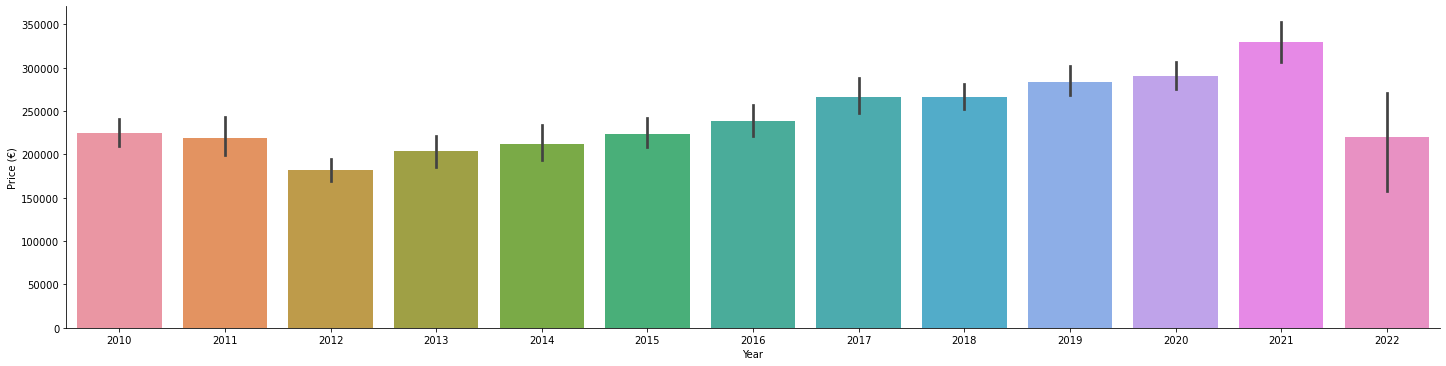

In [92]:
sns.catplot(x="Year", y= "Price (€)", kind="bar",aspect=4,data=df)

### Year and Price boxplot

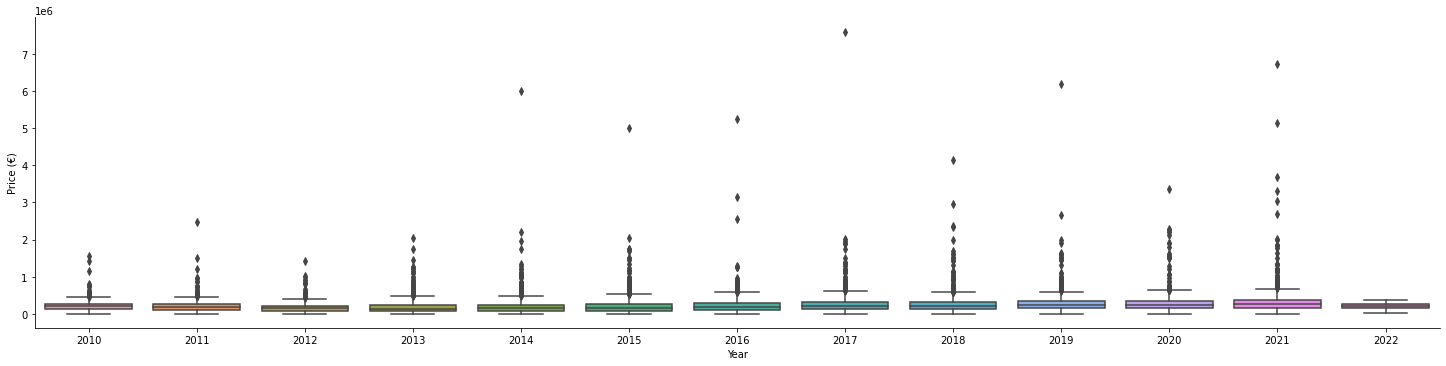

In [93]:
sns.catplot(x="Year", y= "Price (€)", kind="box",aspect=4,data=df)

### Month and Price bar plot

- As you can see for each month over the time price stays relatively consistent 

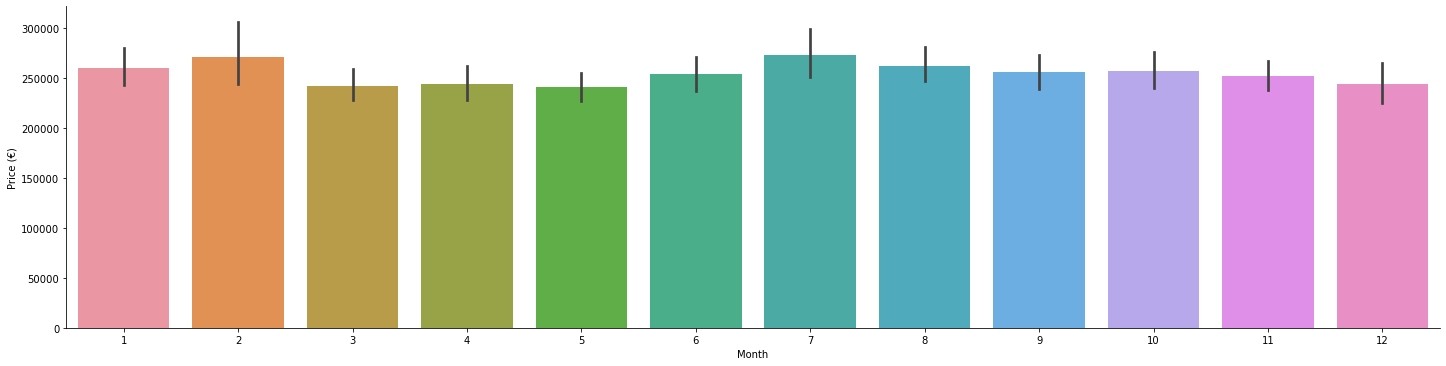

In [94]:
sns.catplot(x="Month", y= "Price (€)", kind="bar",aspect=4,data=df)

### Month and Price boxplot

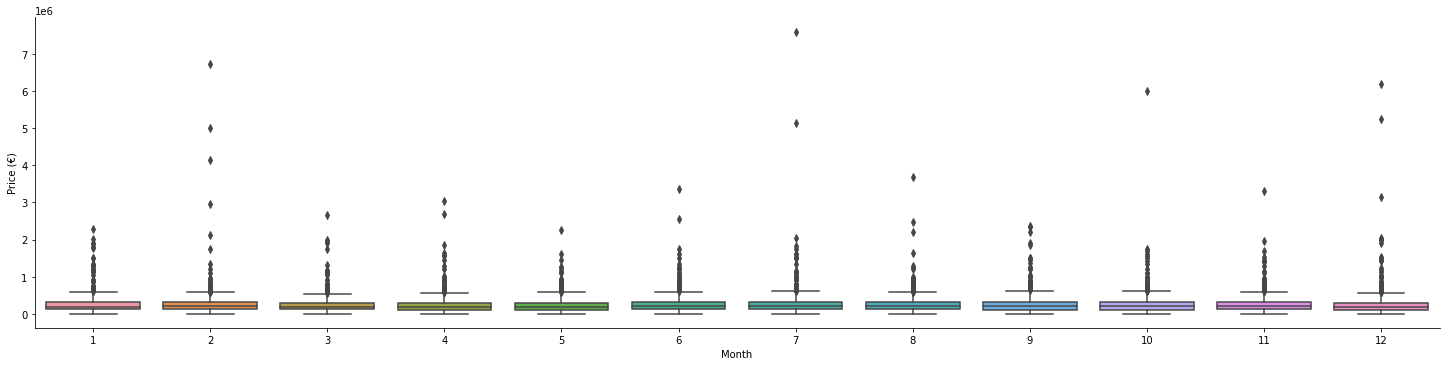

In [95]:
sns.catplot(x="Month", y= "Price (€)", kind="box",aspect=4 ,data=df)

### Decription of property and Price bar chart 

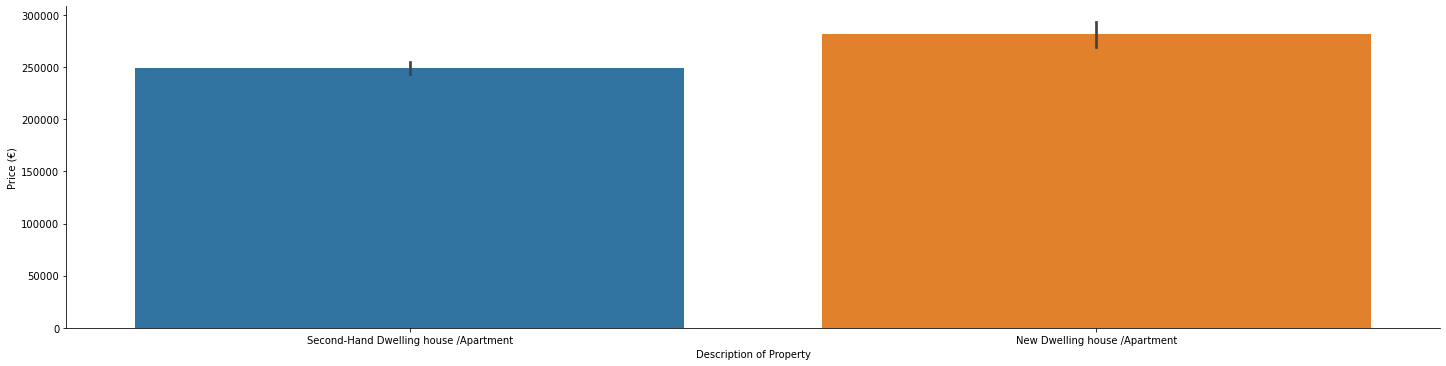

In [96]:
sns.catplot(x="Description of Property", y= "Price (€)", kind="bar",aspect=4,data=df)

### Postal Code and Price bar chart

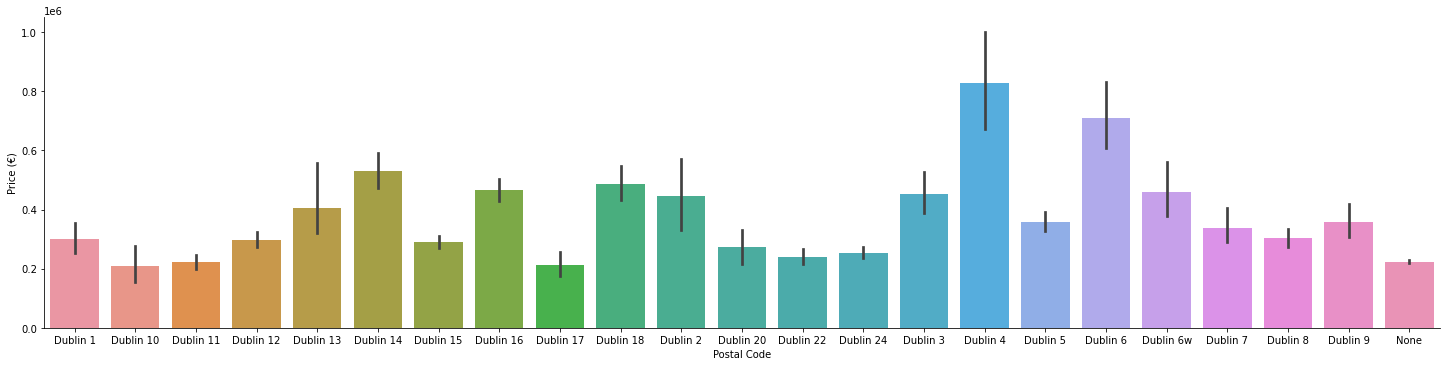

In [97]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="bar",aspect=4,data=df)

### Postal Code and Price boxplot

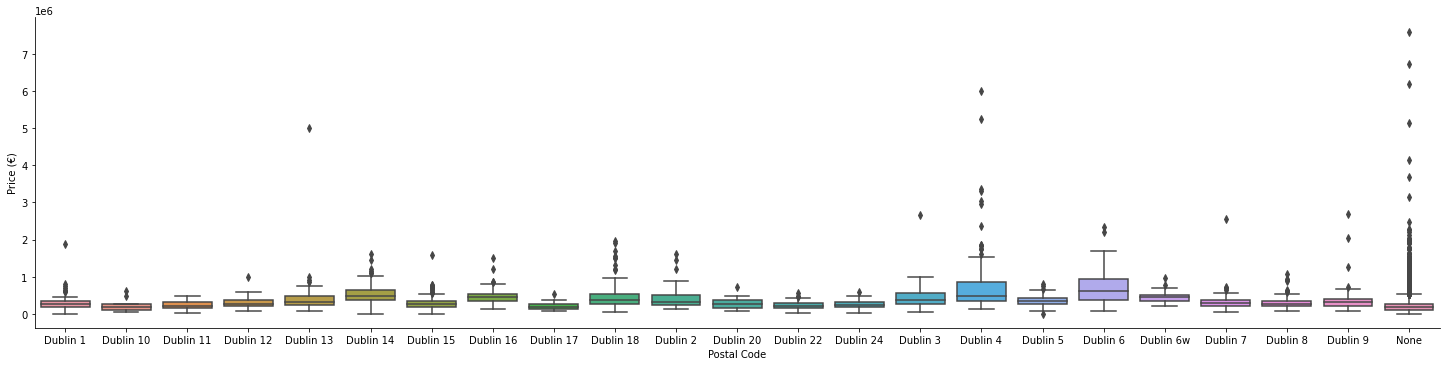

In [98]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="box",aspect=4,data=df)

### Categorical vs Categorical feature plots

#### Comparing Description of Property and County

County
Index 	 Count
Dublin 	 3188
Kilkenny 	 133
Clare 	 240
Kerry 	 284
Tipperary 	 283
Wexford 	 363
Offaly 	 119
Longford 	 90
Waterford 	 245
Limerick 	 348
Wicklow 	 317
Meath 	 399
Galway 	 502
Donegal 	 274
Kildare 	 483
Roscommon 	 143
Cavan 	 153
Louth 	 288
Cork 	 1099
Mayo 	 259
Westmeath 	 174
Sligo 	 148
Laois 	 163
Carlow 	 124
Monaghan 	 76
Leitrim 	 99


(0.0, 100.0)

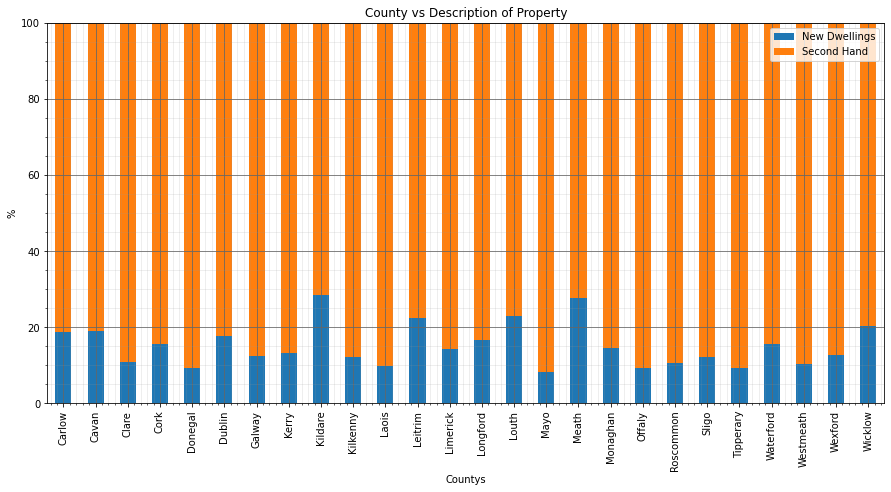

In [134]:
County = pd.unique(df["County"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("County")
print("Index \t Count")

for i in County:
    
    count = df[df["County"] == i].count()['Description of Property']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['County'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','County','Description of Property']].groupby(['County','Description of Property']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="County vs Description of Property", figsize=(15,7), grid=True)


my_plot.legend(["New Dwellings", "Second Hand"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Countys")
my_plot.set_ylabel("%")
my_plot.set_ylim([0,100])

## Part 4: Creating New Features by transforming existing data or adding in external data

How the data frame looks currently: 

In [100]:
df.head(5)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent
0,2016-06-05 00:00:00,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6,2016,0.031368
1,2014-12-22 00:00:00,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2014,0.031368
2,2020-05-22 00:00:00,"17 MERRION PARK, BLACKROCK, DUBLIN",None,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5,2020,0.031368
3,2014-11-27 00:00:00,"KNOCKROE, RATHMOYLE, CO.KILKENNY",None,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2014,0.751880
4,2018-11-22 00:00:00,"15 SHANNON PARK, LIFFORD RD, ENNIS",None,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2018,0.416667


### Additions:

- I have decided to add the following extra features:
    - Year (added in previous section)
    - Month (added in previous section)
    - Seasons
    - Provinces
    - GDP of that year
    -  Number of yearly house loans approved. 




- I have attempted to avoid using loops to manipulate the data due to how expensive they can be with large data sets. 
- ref https://www.kdnuggets.com/2017/11/forget-for-loop-data-science-code-vectorization.html




## Creating Seasons feature

Metrological Seasons: 
- Spring runs from March 1 to May 31.
- Summer runs from June 1 to August 31.
- Autumn runs from September 1 to November 30.
- winter runs from December 1 to February 28.

In [108]:
df['Season'] = df.apply(
    lambda row: row.Month, axis=1)

df.loc[df.Month== 12, 'Season'] = 'Winter'
df.loc[df.Month== 1, 'Season'] = 'Winter'
df.loc[df.Month== 2, 'Season'] = 'Winter'
df.loc[df.Month== 3, 'Season'] = 'Spring'
df.loc[df.Month== 4, 'Season'] = 'Spring'
df.loc[df.Month== 5, 'Season'] = 'Spring'
df.loc[df.Month== 6, 'Season'] = 'Summer'
df.loc[df.Month== 7, 'Season'] = 'Summer'
df.loc[df.Month== 8, 'Season'] = 'Summner'
df.loc[df.Month== 9, 'Season'] = 'Autumn'
df.loc[df.Month== 10, 'Season'] = 'Autumn'
df.loc[df.Month== 11, 'Season'] = 'Autumn'




In [109]:
df.head(10)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season
0,2016-06-05 00:00:00,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6,2016,0.031368,Summer
1,2014-12-22 00:00:00,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2014,0.031368,Winter
2,2020-05-22 00:00:00,"17 MERRION PARK, BLACKROCK, DUBLIN",None,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5,2020,0.031368,Spring
3,2014-11-27 00:00:00,"KNOCKROE, RATHMOYLE, CO.KILKENNY",None,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2014,0.751880,Autumn
4,2018-11-22 00:00:00,"15 SHANNON PARK, LIFFORD RD, ENNIS",None,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2018,0.416667,Autumn
5,2016-01-31 00:00:00,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.0,No,No,Second-Hand Dwelling house /Apartment,None,1,2016,0.031368,Winter
6,2021-11-30 00:00:00,"10 HOLLOW WAY, OAKVIEW VILLAGE, TRALEE",None,Kerry,182000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2021,0.352113,Autumn
7,2016-02-05 00:00:00,"Ballygibbon, Nenagh",None,Tipperary,264317.0,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2,2016,0.353357,Winter
8,2018-12-03 00:00:00,"RANDLESTOWN, BALLYCOGLEY, WEXFORD",None,Wexford,70000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2018,0.275482,Winter
9,2015-11-17 00:00:00,"3 RIVER STREET, CLARA, CO OFFALY",None,Offaly,34500.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2015,0.840336,Autumn


In [119]:

df['Season'] = df['Season'].astype('category')

df.dtypes


Date of Sale (yyyy/mm/dd)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
Month                           int64
Year                            int64
percent                       float64
Season                       category
Province                     category
dtype: object

#### Analysis of Seasons:

In [230]:
df["Season"].describe()

count       9994
unique         5
top       Autumn
freq        2675
Name: Season, dtype: object

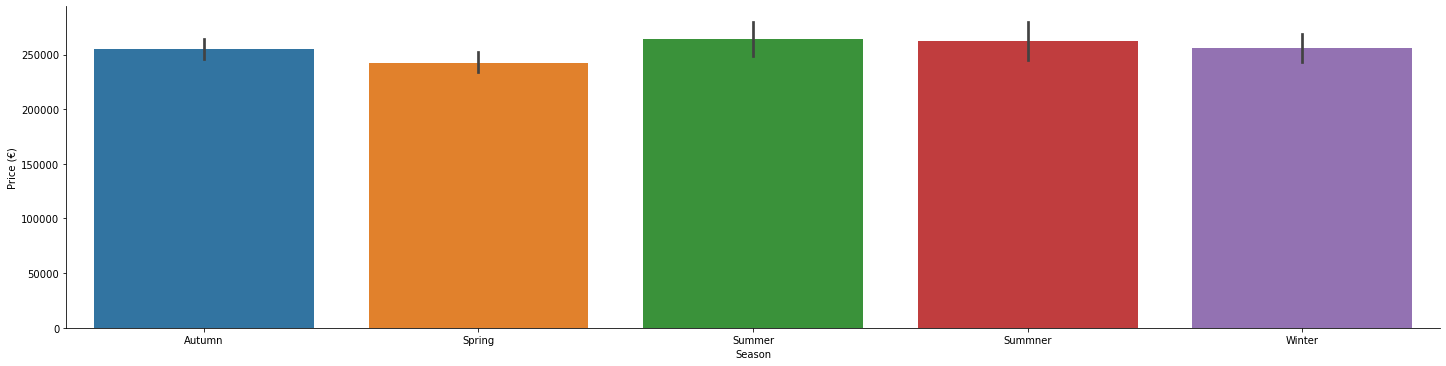

In [214]:
sns.catplot(x="Season", y= "Price (€)", kind="bar",aspect=4,data=df)

## Creating Province Feature

- A province is a territorial region 
- There have been four Provinces of Ireland: Connacht, Leinster, Munster, and Ulster
- Each county falls into one the provinces. 


In [216]:
df['Province'] = df.apply(
    lambda row: row.County, axis=1)

df.loc[df.County== 'Dublin', 'Province'] = 'Leinster'
df.loc[df.County== 'Carlow', 'Province'] = 'Leinster'
df.loc[df.County== 'Kildare', 'Province'] = 'Leinster'
df.loc[df.County== 'Kilkenny', 'Province'] = 'Leinster'
df.loc[df.County== 'Laois', 'Province'] = 'Leinster'
df.loc[df.County== 'Longford', 'Province'] = 'Leinster'
df.loc[df.County== 'Louth', 'Province'] = 'Leinster'
df.loc[df.County== 'Meath', 'Province'] = 'Leinster'
df.loc[df.County== 'Offaly', 'Province'] = 'Leinster'
df.loc[df.County== 'Westmeath', 'Province'] = 'Leinster'
df.loc[df.County== 'Wexford', 'Province'] = 'Leinster'
df.loc[df.County== 'Wicklow', 'Province'] = 'Leinster'
df.loc[df.County== 'Cork', 'Province'] = 'Munster'
df.loc[df.County== 'Clare', 'Province'] = 'Munster'
df.loc[df.County== 'Kerry', 'Province'] = 'Munster'
df.loc[df.County== 'Limerick', 'Province'] = 'Munster'
df.loc[df.County== 'Tipperary', 'Province'] = 'Munster'
df.loc[df.County== 'Waterford', 'Province'] = 'Munster'
df.loc[df.County== 'Galway', 'Province'] = 'Connaught'
df.loc[df.County== 'Leitrim', 'Province'] = 'Connaught'
df.loc[df.County== 'Mayo', 'Province'] = 'Connaught'
df.loc[df.County== 'Roscommon', 'Province'] = 'Connaught'
df.loc[df.County== 'Sligo', 'Province'] = 'Connaught'
df.loc[df.County== 'Donegal', 'Province'] = 'Ulster'
df.loc[df.County== 'Cavan', 'Province'] = 'Ulster'






df.tail(5)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved
9995,2017-12-15 00:00:00,"KNOCKASARTNETT, KILLARNEY, KERRY",None,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2017,0.352113,Winter,Munster,334.6,Unkown
9996,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",None,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2012,0.031368,Winter,Leinster,225.51,17769
9997,2016-12-14 00:00:00,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",None,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12,2016,0.275482,Winter,Leinster,298.73,35037
9998,2017-06-19 00:00:00,"CARRIG RD, PARKMORE, ROSCREA",None,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6,2017,0.353357,Summer,Munster,334.6,Unkown
9999,2017-02-11 00:00:00,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,None,2,2017,0.031368,Winter,Leinster,334.6,Unkown


In [217]:

df['Province'] = df['Province'].astype('category')

df.dtypes

Date of Sale (yyyy/mm/dd)           object
Address                           category
Postal Code                       category
County                            category
Price (€)                          float64
Not Full Market Price             category
VAT Exclusive                     category
Description of Property           category
Property Size Description         category
Month                                int64
Year                                 int64
percent                            float64
Season                            category
Province                          category
GDP (USD-Billion)                 category
Total Number of Loans Approved    category
dtype: object

#### Analysis of Provinces

In [228]:
df["Province"].describe()

count         9994
unique           5
top       Leinster
freq          5841
Name: Province, dtype: object

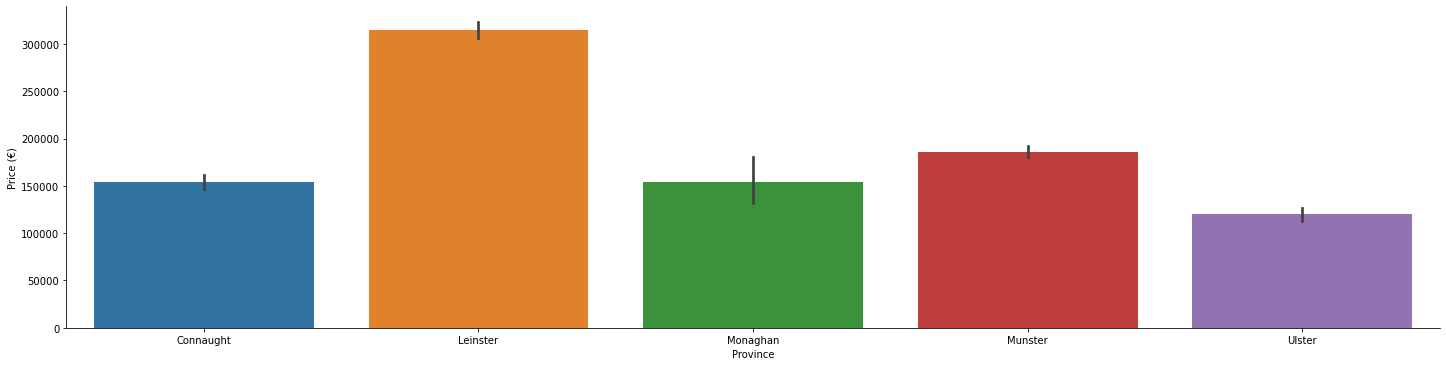

In [218]:
sns.catplot(x="Province", y= "Price (€)", kind="bar",aspect=4,data=df)

## Creating Gross Domestic Product (GDP) Feature

- GDP is the total monetary value of all the finished goods and services produced within a country’s borders in a specific time period. In other words, the total value created by an econnomy. 
- GDP is usuaslly calculated on a yearly basis. 
- The data is obtained from the official world bank https://tradingeconomics.com/ireland/gdp

In [128]:
df['GDP (USD-Billion)'] = df.apply(
    lambda row: row.Year, axis=1)

df.loc[df.Year== 2010, 'GDP (USD-Billion)'] = 221.66
df.loc[df.Year== 2011, 'GDP (USD-Billion)'] = 238.66
df.loc[df.Year== 2012, 'GDP (USD-Billion)'] = 225.51
df.loc[df.Year== 2013, 'GDP (USD-Billion)'] = 238.21
df.loc[df.Year== 2014, 'GDP (USD-Billion)'] = 258.63
df.loc[df.Year== 2015, 'GDP (USD-Billion)'] = 291.46
df.loc[df.Year== 2016, 'GDP (USD-Billion)'] = 298.73
df.loc[df.Year== 2017, 'GDP (USD-Billion)'] = 334.60
df.loc[df.Year== 2018, 'GDP (USD-Billion)'] = 384.85
df.loc[df.Year== 2019, 'GDP (USD-Billion)'] = 399.12
df.loc[df.Year== 2020, 'GDP (USD-Billion)'] = 425.89
df.loc[df.Year== 2021, 'GDP (USD-Billion)'] = 440
df.loc[df.Year== 2022, 'GDP (USD-Billion)'] = 'Unknown'



df.tail(5)


,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion)
9995,2017-12-15 00:00:00,"KNOCKASARTNETT, KILLARNEY, KERRY",None,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2017,0.352113,Winter,Munster,334.6
9996,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",None,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2012,0.031368,Winter,Leinster,225.51
9997,2016-12-14 00:00:00,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",None,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12,2016,0.275482,Winter,Leinster,298.73
9998,2017-06-19 00:00:00,"CARRIG RD, PARKMORE, ROSCREA",None,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6,2017,0.353357,Summer,Munster,334.6
9999,2017-02-11 00:00:00,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,None,2,2017,0.031368,Winter,Leinster,334.6


In [176]:

df['GDP (USD-Billion)'] = df['GDP (USD-Billion)'].astype('category')

df.dtypes

Date of Sale (yyyy/mm/dd)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
Month                           int64
Year                            int64
percent                       float64
Season                       category
Province                     category
GDP (USD-Billion)            category
dtype: object

#### Analysis of GDP (USD-Billion)

In [227]:
df["GDP (USD-Billion)"].describe()

count     9994.00
unique      13.00
top        384.85
freq      1172.00
Name: GDP (USD-Billion), dtype: float64

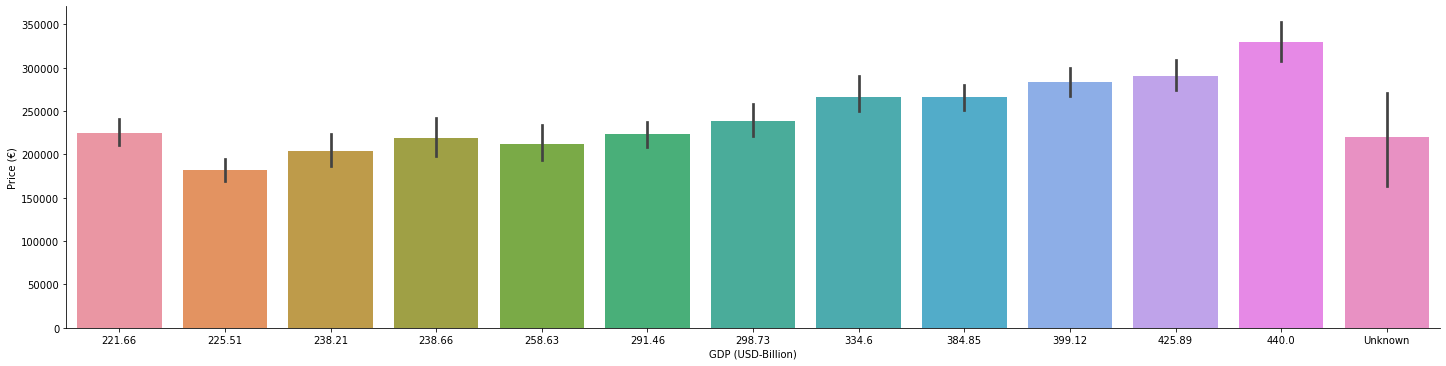

In [219]:
sns.catplot(x="GDP (USD-Billion)", y= "Price (€)", kind="bar",aspect=4,data=df)

## Creating 'Number of Loans approved per year' feature:

- This data was obtained form the Central Statistics Office. 
- It indicates the number of loans that were approved in a calender year. 
- I decided to sum New property and Second hand property per year to obtain a bigger picture.
- Unfortunatetly, data was only avaiable to year 2016. 

In [177]:
df1 = pd.read_csv('House_loan_data.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
df1.head(5)

,Statistic,Year,House Type New or Second hand,UNIT,VALUE
0,Number of House Loans Approved,1970,New houses,Number,7884.0
1,Number of House Loans Approved,1970,Second-hand houses,Number,4587.0
2,Number of House Loans Approved,1971,New houses,Number,10626.0
3,Number of House Loans Approved,1971,Second-hand houses,Number,4692.0
4,Number of House Loans Approved,1972,New houses,Number,13389.0


#### Dropping Unecessary Data

In [178]:
df1.drop(df1.index[94:377],0,inplace=True)


In [179]:
df1.drop(df1.index[0:80],0,inplace=True)


In [195]:
df1.head(40)

,Statistic,Year,House Type New or Second hand,UNIT,VALUE
80,Number of House Loans Approved,2010,New houses,Number,6991.0
81,Number of House Loans Approved,2010,Second-hand houses,Number,13030.0
82,Number of House Loans Approved,2011,New houses,Number,2960.0
83,Number of House Loans Approved,2011,Second-hand houses,Number,9874.0
84,Number of House Loans Approved,2012,New houses,Number,3457.0
85,Number of House Loans Approved,2012,Second-hand houses,Number,14312.0
86,Number of House Loans Approved,2013,New houses,Number,2974.0
87,Number of House Loans Approved,2013,Second-hand houses,Number,16284.0
88,Number of House Loans Approved,2014,New houses,Number,4461.0
89,Number of House Loans Approved,2014,Second-hand houses,Number,27436.0


#### Creating the new feature

In [208]:
df2 = df1['VALUE']


print("Total 2010 = ", df2.iloc[0:2].sum())
print("Total 2011 = ", df2.iloc[2:4].sum())
print("Total 2012 = ", df2.iloc[4:6].sum())
print("Total 2013 = ", df2.iloc[6:8].sum())
print("Total 2014 = ", df2.iloc[8:10].sum())
print("Total 2015 = ", df2.iloc[10:12].sum())
print("Total 2016 = ", df2.iloc[12:14].sum())


Total 2010 =  20021.0
Total 2011 =  12834.0
Total 2012 =  17769.0
Total 2013 =  19258.0
Total 2014 =  31897.0
Total 2015 =  32236.0
Total 2016 =  35037.0


In [210]:
df['Total Number of Loans Approved'] = df.apply(
    lambda row: row.Year, axis=1)

df.loc[df.Year== 2010, 'Total Number of Loans Approved'] = 20021
df.loc[df.Year== 2011, 'Total Number of Loans Approved'] = 12834
df.loc[df.Year== 2012, 'Total Number of Loans Approved'] = 17769
df.loc[df.Year== 2013, 'Total Number of Loans Approved'] = 19258
df.loc[df.Year== 2014, 'Total Number of Loans Approved'] = 31897
df.loc[df.Year== 2015, 'Total Number of Loans Approved'] = 32236
df.loc[df.Year== 2016, 'Total Number of Loans Approved'] = 35037
df.loc[df.Year== 2017, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2018, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2019, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2020, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2021, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2022, 'Total Number of Loans Approved'] = 'Unkown'



df['Total Number of Loans Approved'] = df['Total Number of Loans Approved'].astype('category')

df.dtypes



Date of Sale (yyyy/mm/dd)           object
Address                           category
Postal Code                       category
County                            category
Price (€)                          float64
Not Full Market Price             category
VAT Exclusive                     category
Description of Property           category
Property Size Description         category
Month                                int64
Year                                 int64
percent                            float64
Season                            category
Province                          category
GDP (USD-Billion)                 category
Total Number of Loans Approved    category
dtype: object

In [220]:
df.head(5)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved
0,2016-06-05 00:00:00,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6,2016,0.031368,Summer,Leinster,298.73,35037
1,2014-12-22 00:00:00,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2014,0.031368,Winter,Leinster,258.63,31897
2,2020-05-22 00:00:00,"17 MERRION PARK, BLACKROCK, DUBLIN",None,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5,2020,0.031368,Spring,Leinster,425.89,Unkown
3,2014-11-27 00:00:00,"KNOCKROE, RATHMOYLE, CO.KILKENNY",None,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2014,0.751880,Autumn,Leinster,258.63,31897
4,2018-11-22 00:00:00,"15 SHANNON PARK, LIFFORD RD, ENNIS",None,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11,2018,0.416667,Autumn,Munster,384.85,Unkown


#### Analysis of "Total Number of Loans Approved"

In [226]:
df["Total Number of Loans Approved"].describe()

count       9994
unique         8
top       Unkown
freq        5374
Name: Total Number of Loans Approved, dtype: object

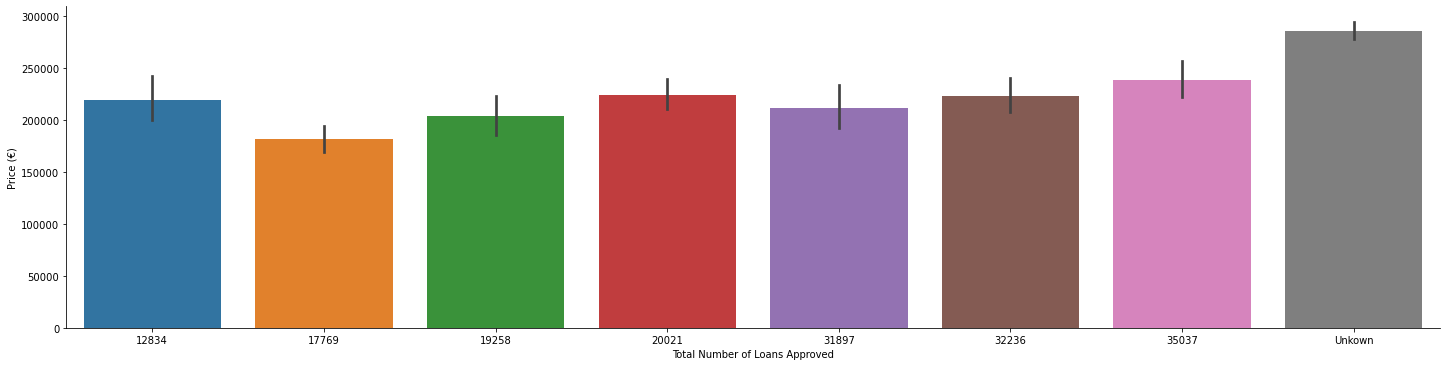

In [223]:
sns.catplot(x="Total Number of Loans Approved", y= "Price (€)", kind="bar",aspect=4,data=df)

#### Describing all categorical features again:

In [222]:

category_columns = df.select_dtypes(['category']).columns

df[category_columns].describe().T

,count,unique,top,freq
Address,9994,9974,"MONUMENT RD, MENLO, GALWAY",2
Postal Code,9994,23,None,8135
County,9994,26,Dublin,3188
Not Full Market Price,9994,2,No,9546
VAT Exclusive,9994,2,No,8397
Description of Property,9994,2,Second-Hand Dwelling house /Apartment,8362
Property Size Description,9994,5,None,8965
Season,9994,5,Autumn,2675
Province,9994,5,Leinster,5841
GDP (USD-Billion),9994.0,13.0,384.85,1172.0


In [224]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9994.0,254297.557243,280514.246613,5500.0,120000.0,200000.0,308370.0225,7600000.0


### Final CSV file

In [212]:
df.to_csv('final-file-additonal-features-17350796.csv', index=False)

### Conclusions

This was a challenging data set to examine. Mainly, due to the fact that this data was entered by human so there is a great chance of error throughout. However, with the power of modules like Pandas and Numpy it was possible to evaluate the data and clean the data, and finally visuall it and make inferences. 